In [1]:
import os

# Get list of entries in the current directory
entries = os.listdir()

# Or specify a path
entries = os.listdir('./handwritten-digits-and-operators')

# Print each entry
for entry in entries:
    print(entry)

CompleteDataSet_validation_tuples.npy
CompleteDataSet_training_tuples.npy
CompleteDataSet_tuples.npy
CompleteDataSet_testing_tuples.npy
CompleteImages


Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from os import listdir
from os.path import join, isfile
from PIL import Image
from sklearn.model_selection import train_test_split


Data Loading Function

In [2]:
def load_images(base_path, symbols):
    data = []
    labels = []
    
    for label, symbol in enumerate(symbols):
        path = os.path.join(base_path, symbol)
        if not os.path.isdir(path):
            print(f"Warning: Directory for symbol '{symbol}' not found. Skipping.")
            continue
        for file in os.listdir(path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add more extensions if needed
                image = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(f"Warning: Could not read image {file} in {symbol} directory. Skipping.")
                    continue
                image = cv2.bitwise_not(image)  # Invert the image
                image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
                img_array = image.reshape(4096)  # Flatten to 1D array
                
                data.append(img_array)
                labels.append(label)
    return np.array(data), np.array(labels)


In [4]:
# Define the base path and symbols
base_path = './better_dataset'
symbols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']

In [7]:
data, labels = load_images(base_path, symbols)

combined_data = np.column_stack((data, labels))

# Shuffle the data
np.random.shuffle(combined_data)

# Split the data
train_val, test = train_test_split(combined_data, test_size=0.2, stratify=combined_data[:, -1])
train, val = train_test_split(train_val, test_size=0.2, stratify=train_val[:, -1])


In [8]:
# Print the sizes of the resulting datasets
print(f"Full dataset size: {len(combined_data)}")
print(f"Training set size: {len(train)} ({len(train)/len(combined_data):.2%})")
print(f"Validation set size: {len(val)} ({len(val)/len(combined_data):.2%})")
print(f"Test set size: {len(test)} ({len(test)/len(combined_data):.2%})")

# Save the splits to CSV files
np.savetxt("train_data.csv", train, delimiter=",")
np.savetxt("val_data.csv", val, delimiter=",")
np.savetxt("test_data.csv", test, delimiter=",")

Full dataset size: 10071
Training set size: 6444 (63.99%)
Validation set size: 1612 (16.01%)
Test set size: 2015 (20.01%)


Visualizing preprocessed data

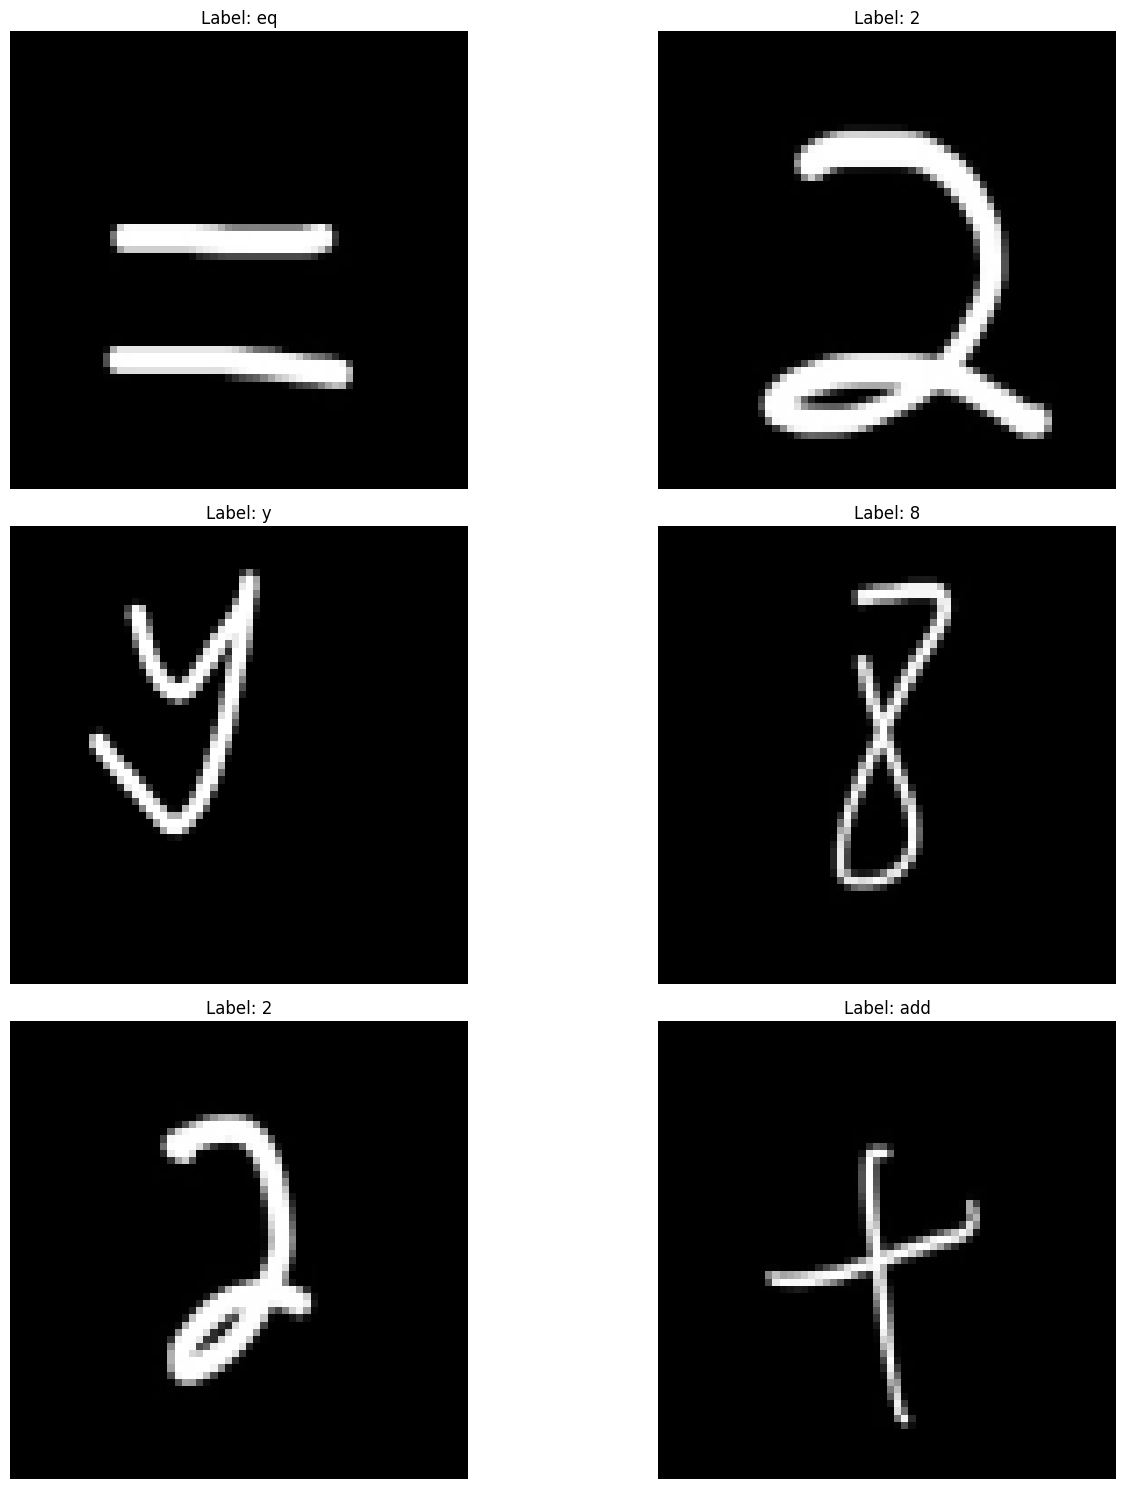

In [9]:
def visualize_random_images(csv_files, symbols, num_images=2):
    plt.figure(figsize=(15, 5 * len(csv_files)))
    
    for i, file in enumerate(csv_files):
        # Load the data
        data = np.loadtxt(file, delimiter=",")
        
        # Separate features and labels
        X, y = data[:, :-1], data[:, -1]
        
        plt.subplot(len(csv_files), num_images, i*num_images + 1)
        plt.title(f"Random images from {file}")
        
        for j in range(num_images):
            # Choose a random index
            idx = np.random.randint(0, len(X))
            
            # Reshape the image
            img = X[idx].reshape(64, 64)
            
            # Plot the image
            plt.subplot(len(csv_files), num_images, i*num_images + j + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"Label: {symbols[int(y[idx])]}")
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# After creating the CSV files, call the visualization function
csv_files = ["train_data.csv", "val_data.csv", "test_data.csv"]
visualize_random_images(csv_files, symbols)